# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [54]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor

# Reading CSV Data

In [ ]:
df=pd.read_csv('Prediction Models/Life Expectancy Prediction/Dataset/Life Expectancy Data.csv)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# EDA

In [56]:
df.shape

(2938, 22)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- Normalizing feature names

In [58]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [59]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [60]:
num_col=[]
cat_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col)        

['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


In [61]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

- 14 columns have missing data

In [62]:
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

Country                          0.000000
Year                             0.000000
Status                           0.000000
Lifeexpectancy                   0.340368
AdultMortality                   0.340368
infantdeaths                     0.000000
Alcohol                          6.603131
percentageexpenditure            0.000000
HepatitisB                      18.822328
Measles                          0.000000
BMI                              1.157250
under-fivedeaths                 0.000000
Polio                            0.646698
Totalexpenditure                 7.692308
Diphtheria                       0.646698
HIV/AIDS                         0.000000
GDP                             15.248468
Population                      22.191967
thinness1-19years                1.157250
thinness5-9years                 1.157250
Incomecompositionofresources     5.684139
Schooling                        5.547992
dtype: float64

- calculating percentage of missing data in each column

In [63]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [64]:
df['Country'].nunique()

193

In [65]:
df.duplicated().sum()

0

In [66]:
corr_data = df[[ 'Year', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling','Lifeexpectancy']].corr()['Lifeexpectancy'].sort_values()
corr_data

AdultMortality                 -0.696359
HIV/AIDS                       -0.556556
thinness1-19years              -0.477183
thinness5-9years               -0.471584
under-fivedeaths               -0.222529
infantdeaths                   -0.196557
Measles                        -0.157586
Population                     -0.021538
Year                            0.170033
Totalexpenditure                0.218086
HepatitisB                      0.256762
percentageexpenditure           0.381864
Alcohol                         0.404877
GDP                             0.461455
Polio                           0.465556
Diphtheria                      0.479495
BMI                             0.567694
Incomecompositionofresources    0.724776
Schooling                       0.751975
Lifeexpectancy                  1.000000
Name: Lifeexpectancy, dtype: float64

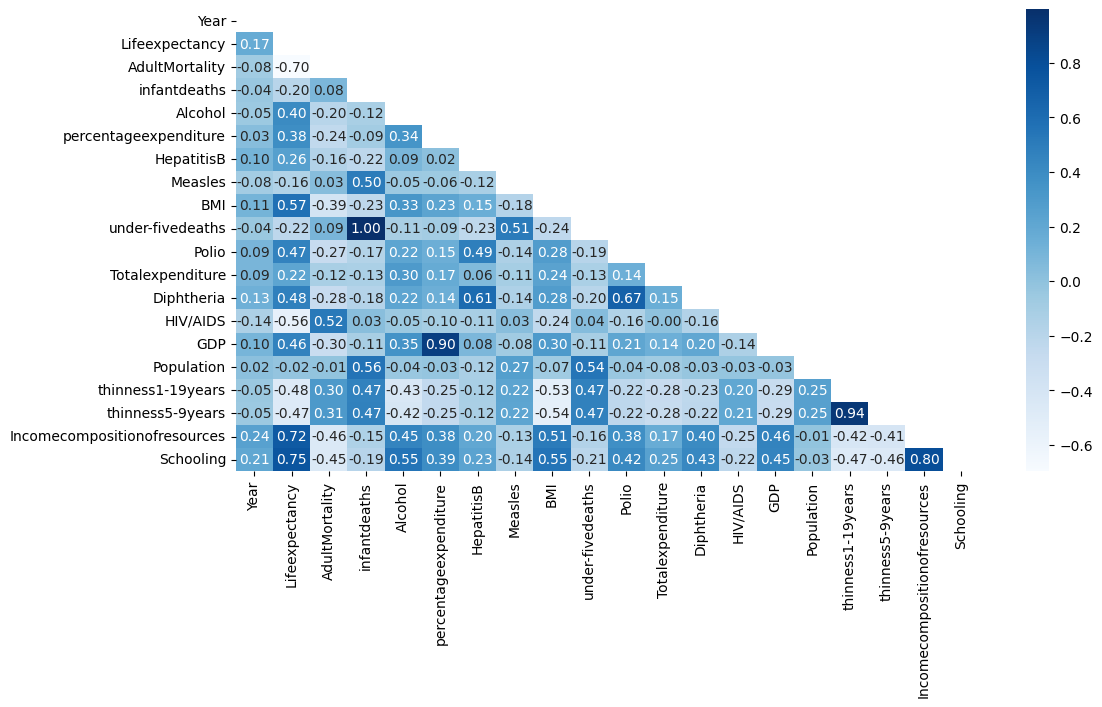

In [67]:
corr = df[num_col].corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True,mask=mask, cmap='Blues', fmt='.2f')
plt.show()

### From Prevoius plot we got alot of information
- Life Expectancy and the population rose over the years
- The More Gdp and Total Expendture the more the life expectany rate
- The Thinness 1-19 and Thinness 5-9 have the same distribution so we will likley chose one of them for our model
- The more the country is vacinated the more the life expectancy 
- The BMI Column is not making Sense our median BMI is about 50 that means that more than half the population of our data  is severly obese and in need of medical care
- Under 5 death and infant death are practically the same column so we choose the more genralized column the under 5 column

In [68]:
df.drop(columns=['thinness5-9years','BMI','infantdeaths'],inplace=True)

- dropping columns which are highly co-related with others

Skewness: -0.638605


<Axes: >

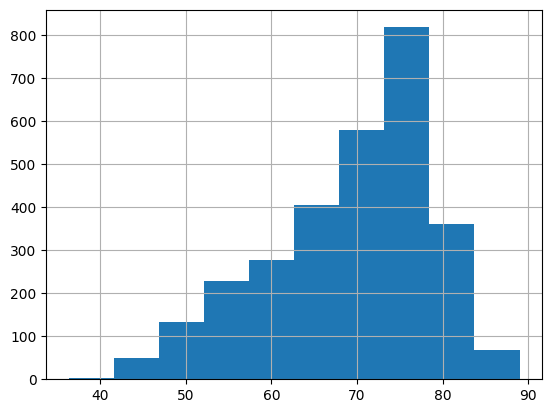

In [69]:
print("Skewness: %f" % df['Lifeexpectancy'].skew())
df['Lifeexpectancy'].hist()

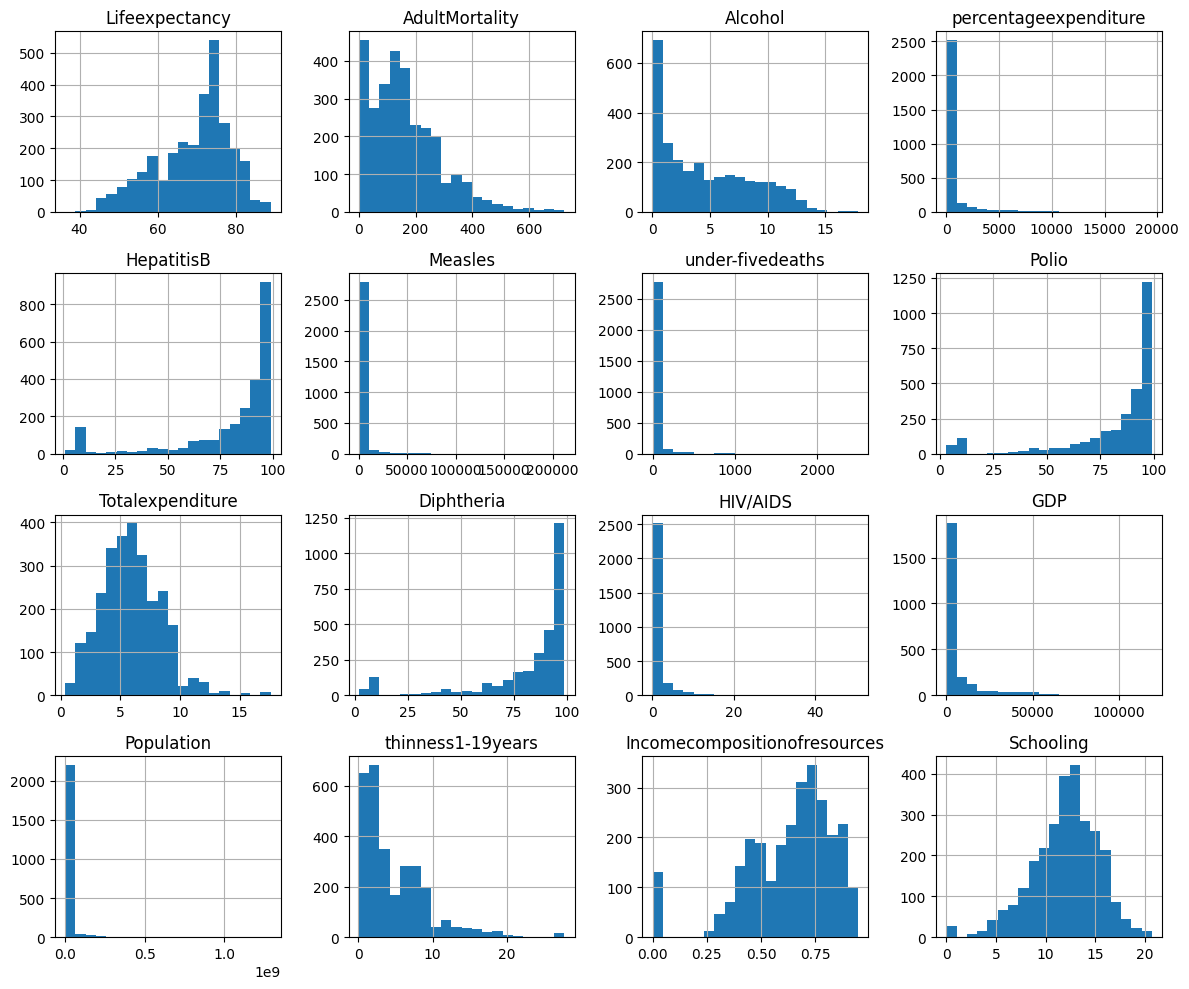

In [70]:
to_remove = ['thinness5-9years','BMI','infantdeaths']

# Removing elements
for item in to_remove:
    if item in num_col:
        num_col.remove(item)

df[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

**Time Analysis of different features**

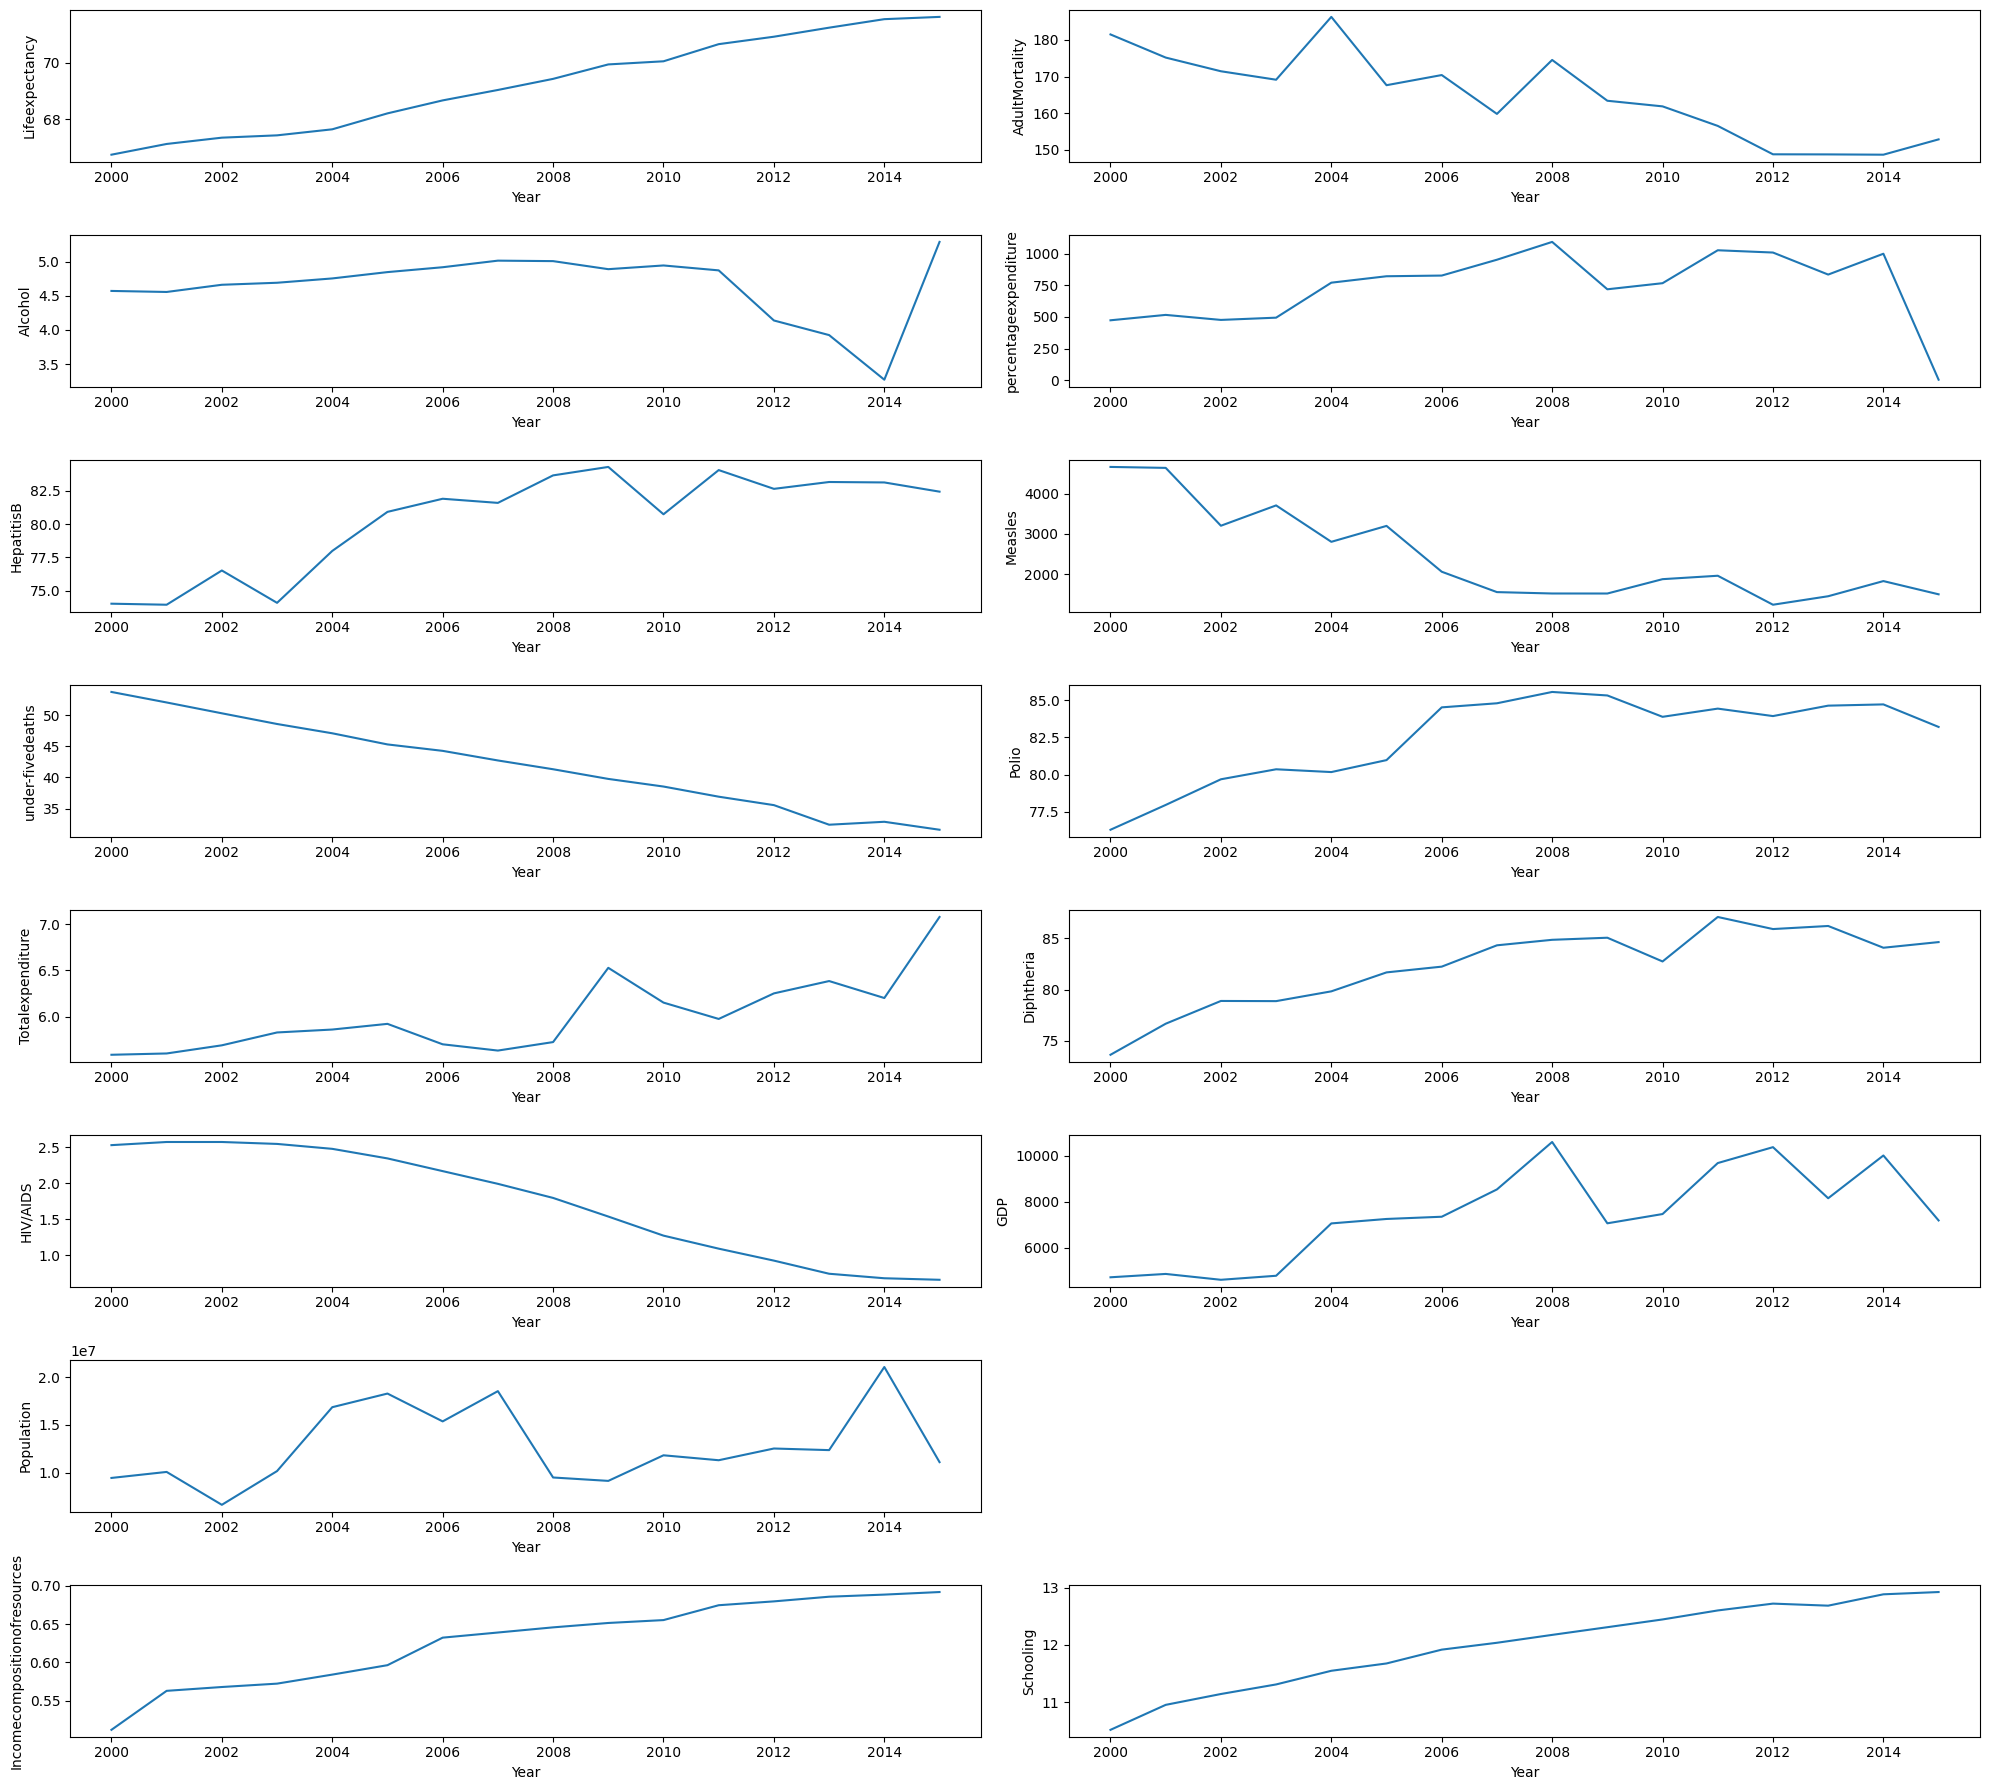

In [71]:
fig,axes=plt.subplots(nrows=len(df[num_col].columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(df[num_col].drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year',y=df[col],data=df,ax=axes[row_idx,col_idx],markers=True,ci=None)
fig.delaxes(axes[6,1])
plt.tight_layout()
plt.show() 

- With years Life Expectancy, Schooling, Income composition of resources is increasing
- while HIV/AIDS, under 5 deaths, Measeles and Adult Mortality is decreasing

<Axes: ylabel='count'>

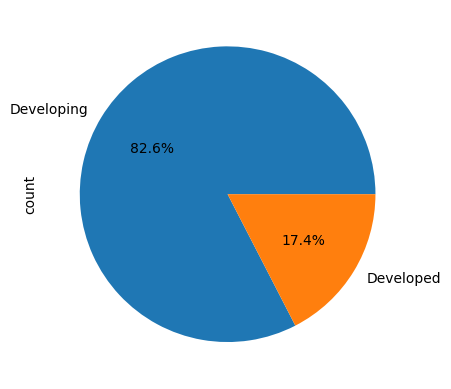

In [72]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

In [73]:
!pip install pycountry-convert

In [74]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

- Instead of using 193 countries using their respective continents for generalized view

In [75]:
df['Country'].replace('Republic of Korea', 'South Korea', inplace=True)
df['Continent'] = df['Country'].apply(map_country2continent)
df.drop(columns=['Country'], inplace=True)

In [76]:
df['Continent'].unique()


array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

In [77]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

# Preprocessing

In [78]:
#encoding continent
continent_enc = LabelEncoder()
df_train['Continent'] = continent_enc.fit_transform(df_train['Continent'])
df_test['Continent'] = continent_enc.transform(df_test['Continent'])

#encoding year
year_enc = LabelEncoder()
df_train['Year'] = year_enc.fit_transform(df_train['Year'])
df_test['Year'] = year_enc.transform(df_test['Year'])

#encoding status
status_enc = LabelEncoder()
df_train['Status'] = status_enc.fit_transform(df_train['Status'])
df_test['Status'] = status_enc.transform(df_test['Status'])

In [79]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Percentage    
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")   
#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False

- Handling Outliers

In [80]:
for col in (df_train[num_col].drop(columns='Year').columns):
    outlier_percentage(df_train,col)

Lifeexpectancy
Outliers percentage: 0.5957446808510638 %
-------------------------
AdultMortality
Outliers percentage: 3.1914893617021276 %
-------------------------
Alcohol
Outliers percentage: 0.0 %
-------------------------
percentageexpenditure
Outliers percentage: 12.851063829787234 %
-------------------------
HepatitisB
Outliers percentage: 8.382978723404255 %
-------------------------
Measles
Outliers percentage: 18.425531914893618 %
-------------------------
under-fivedeaths
Outliers percentage: 13.148936170212766 %
-------------------------
Polio
Outliers percentage: 9.446808510638299 %
-------------------------
Totalexpenditure
Outliers percentage: 1.148936170212766 %
-------------------------
Diphtheria
Outliers percentage: 10.170212765957446 %
-------------------------
HIV/AIDS
Outliers percentage: 18.382978723404257 %
-------------------------
GDP
Outliers percentage: 12.042553191489363 %
-------------------------
Population
Outliers percentage: 9.787234042553191 %
-------

In [81]:
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  
for column in (df_train[num_col].drop(columns='Year').columns):
    replace_with_threshholds(df_train,df_test,column)

In [82]:
X_train, y_train = df_train.drop(columns=['Lifeexpectancy']), df_train['Lifeexpectancy']
X_test, y_test = df_test.drop(columns=['Lifeexpectancy']), df_test['Lifeexpectancy']

In [83]:
num_attribs=df_train[num_col].drop(columns=['Year','Lifeexpectancy']).columns
cat_attribs=['Status','Continent', 'Year']

In [84]:
num_pipeline=make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'))
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_attribs),
     ('cat',cat_pipeline,cat_attribs)
     ])

In [85]:
X_1=pd.DataFrame(preprocessing.fit_transform(X_train))
X_1_test=pd.DataFrame(preprocessing.transform(X_test))

In [86]:
y_train.fillna(y_train.median(),inplace=True)
y_test.fillna(y_train.median(),inplace=True)

# Finding Feature Importance

In [87]:
#Split your data into Train and validation Data
X_train_1,X_valid,y_train_1,y_valid=train_test_split(X_1,y_train,test_size=0.2,random_state=42)
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=42)
model.fit(X_train_1,y_train_1)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [88]:
feature_importance_df

,Feature,Importance
9,Totalexpenditure,0.590301
13,Population,0.170587
0,Year,0.106853
16,Schooling,0.032810
5,HepatitisB,0.021376
17,Continent,0.013091
14,thinness1-19years,0.012195
12,GDP,0.011723
1,Status,0.008530
7,under-fivedeaths,0.006361


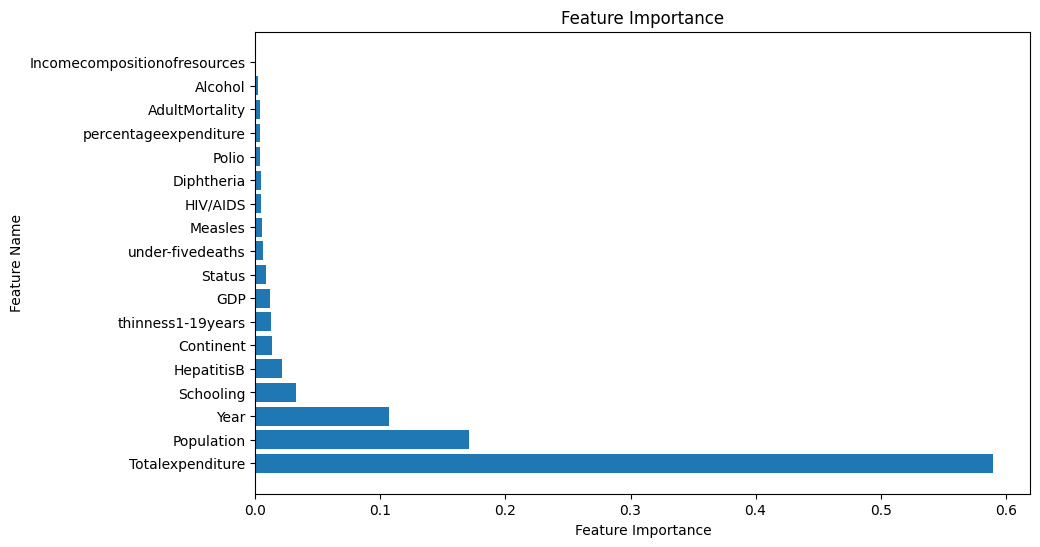

In [89]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

# Model Training

In [90]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(X_1 , y_train)
    y_pred = model.predict(X_1_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))


In [91]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df=models_df.sort_values("R2_score", ascending = False)

In [92]:
models_df

,Model-Name,R2_score,RMSE
4,ExtraTreesRegressor,97.338019,1.517597
2,RandomForestRegressor,96.813425,1.660412
7,XGBRegressor,96.734258,1.680911
0,GradientBoostingRegressor,94.732812,2.134732
8,XGBRFRegressor,94.471946,2.186956
6,DecisionTreeRegressor,92.602973,2.529778
5,AdaBoostRegressor,90.109303,2.925279
1,SVR,87.418590,3.299275
3,LinearRegression,85.707332,3.516499


# Model Comparison

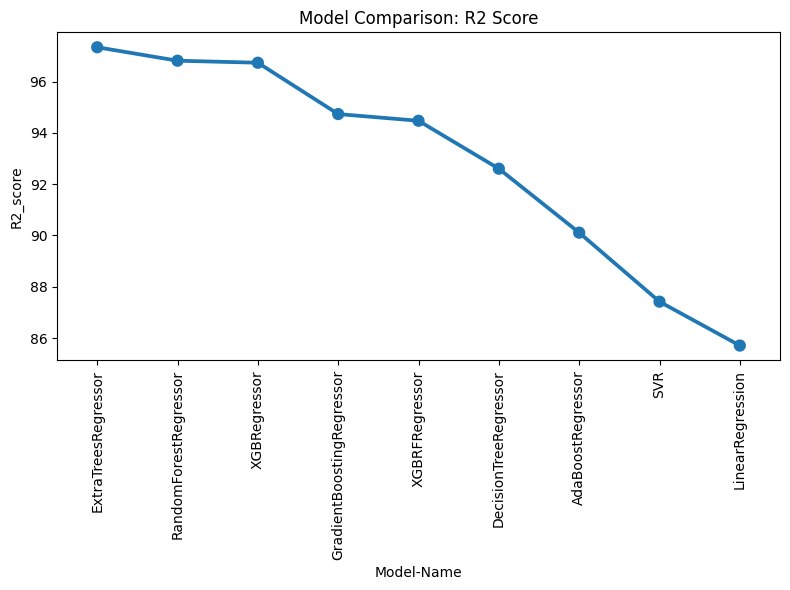

In [93]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

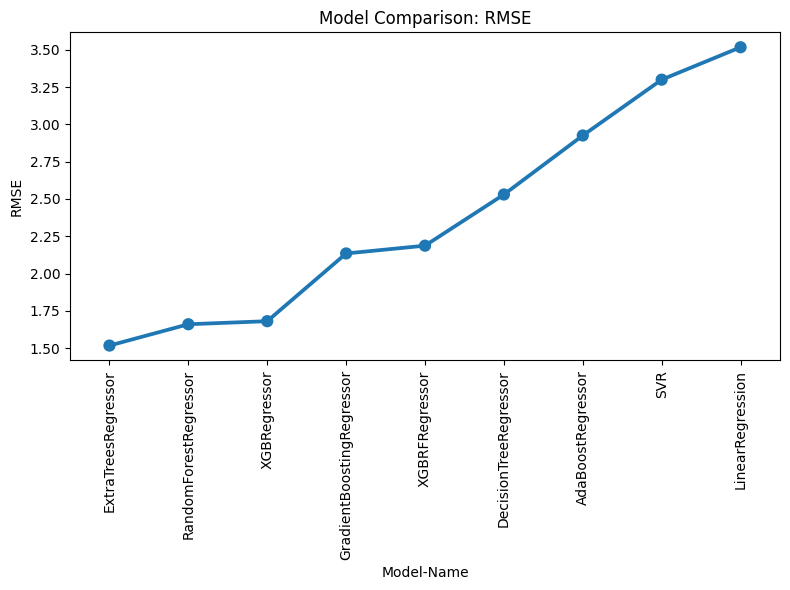

In [94]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

In [95]:
fm=ExtraTreesRegressor(random_state=42)

In [96]:
cross_val=cross_val_score(fm,X_valid,y_valid,scoring='r2',cv=20)
cross_val

array([0.96380457, 0.90593649, 0.96403208, 0.96374682, 0.90596543,
       0.93895325, 0.94590582, 0.92803938, 0.95700562, 0.97217231,
       0.92007171, 0.94928695, 0.94097992, 0.96393002, 0.92084502,
       0.91848875, 0.9338246 , 0.93364351, 0.95528469, 0.97993846])

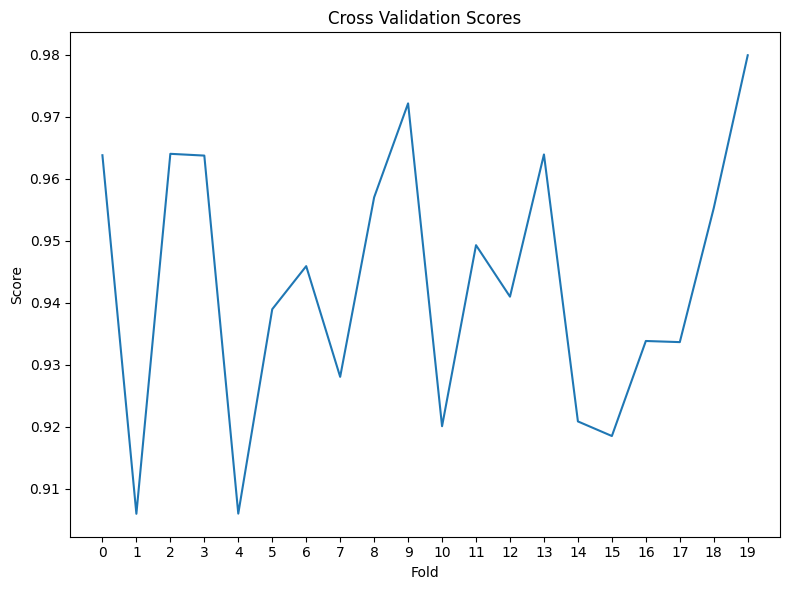

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,20))
plt.tight_layout()
plt.show()

In [98]:
cross_val.mean()

0.9430927708114355